In [16]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd                                                         
import matplotlib.pyplot as plt                                            
import matplotlib as mpl                                                    
mpl.rcParams['axes.unicode_minus'] = False                                  
#plt.rcParams('font.family') = 'RIDIBatang'                          
#plt.rcParams('font.size') = 16                                             
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\RIDIBatang.otf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'RIDIBatang')
plt.rc('font', size = 16)
import seaborn as sns                                                       
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

***
나이브 베이즈(Naive Bayes)
***
확률 기반 머신러닝 분류 알고리즘으로 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고,  
이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률의 레이블로 분류하는 알고리즘이다.  

***
가우시안 나이브베이즈(Gaussian NaiveBayes)
***
분류 특징들의 값이 정규(가우시안) 분포되어 있다는 가정하에 조건부 확률을 계산하며 
연속적인 성질이 있는 특성 데이터를 분류하는데 적합하다.

P(A) : 어떤 사건 A가 발생할 확률  
P(B) : 어떤 사건 B가 발생할 확률  
P(A|B) : 어떤 사건 B가 발생한다는 가정하에 사건 A가 발생할 확률
P(B|A) : 어떤 사건 A가 발생한다는 가정하에 사건 B가 발생할 확률

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

***

<img src="./나이브베이즈 (1).png">
<img src="./나이브베이즈 (2).png">
<img src="./나이브베이즈 (3).png">

***
가우시안 나이브 베이즈를 활용한 붓꽃(iris) 분류
***
Scikit-learn이 제공하는 iris 데이터를 활용해 데이터의 특징에 따른 붓꽃의 종류를 구분한다.

In [2]:
#Scikit-learn이 제공하는 붓꽃 데이터를 불러오기 위해 import 한다.
from sklearn.datasets import load_iris

***
데이터 획득
***
Scikit-learn에서 제공하는 iris dataset을 사용한다.

In [3]:
dataset = load_iris() # Scikit-learn이 제공하는 iris dataset을 불러온다.
#print(type(dataset))
#print(dataset)
#print(dataset.data) # Scikit-learn이 제공하는 dataset에서 데이터(피쳐)만 얻어온다.
#'sepal length (cm)' : 꽃받침 길이
#'sepal width (cm)' : 꽃받침 너비
#'petal length (cm)': 꽃잎 길이
#'petal width (cm)' : 꽃잎 너비
#print(dataset.feature_names) #Scikit-learn이 제공하는 dataset에서 피쳐 이름만 얻어온다.
#print(dataset.target) #Scikit-learn이 제공하는 dataset에서 결과(레이블)만 얻어온다.
#'setosa' : 0
#'versicolor' : 1
#'virginica' : 2
#print(dataset.target_names) #Scikit-learn이 제공하는 dataset에서 레이블 이름만 얻어온다.

In [4]:
df= pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target1'] = dataset.target

'''
df['target2'] = np.NaN
df.loc[df.target1 == 0, 'target2'] = 'setosa'
df.loc[df.target1 == 1, 'target2'] = 'versicolor'
df.loc[df.target1 == 2, 'target2'] = 'virginica'
'''

df['target'] = df.target1.map({0 : 'setosa', 1 : 'versicolor', 2: 'virginica'})
#df['target2'] = pd.Series(dataset.target).map({0 : 'setosa', 1 : 'versicolor', 2: 'virginica'})
#df.to_csv('./data/iris_df.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target1,target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


***
데이터 시각화
***

In [5]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

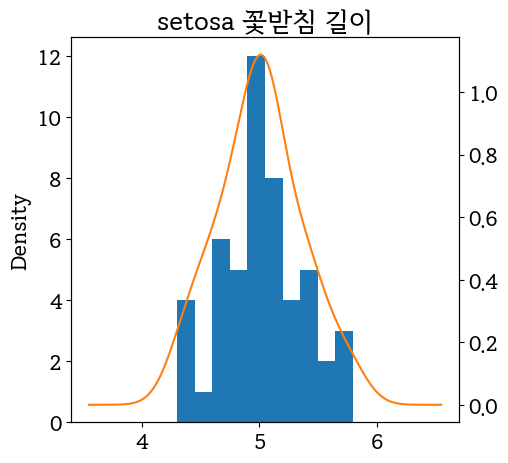

In [6]:
#plt.figure(figsize=[8, 6])
setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=[5, 5], title='setosa 꽃받침 길이')
plt.show()

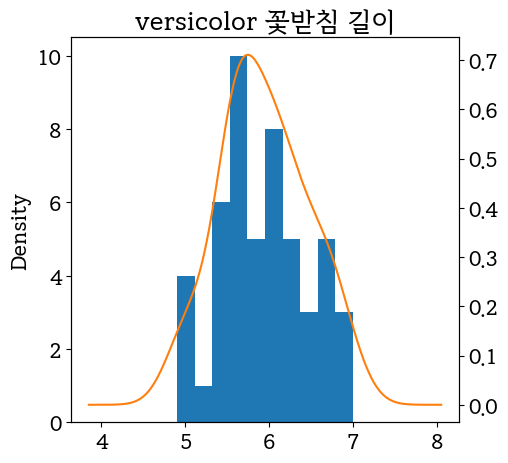

In [7]:
versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=[5, 5], title='versicolor 꽃받침 길이')
plt.show()

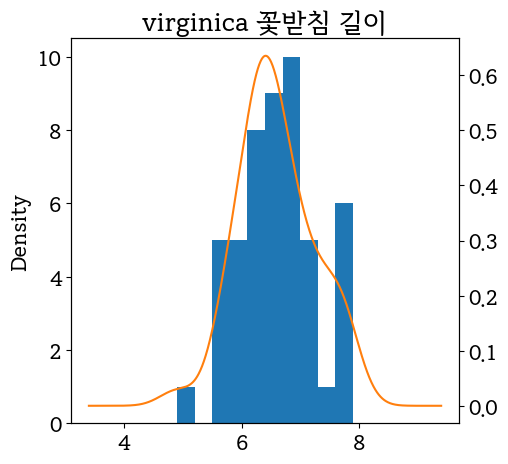

In [8]:
virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', secondary_y=True, figsize=[5, 5], title='virginica 꽃받침 길이')
plt.show()

***
데이터 다듬기
***

In [9]:
# 가우시안 나이브 베이즈 모델 학습을 시키기 위해 train 데이터와 test 데이터로 나눈다.

#피쳐와 레이블이 데이터프레임 한 개에 모두 들어있을 경우 아래와 같이 학습 데이터와 테스트 데이터를 나눈다.
#train, test = train_test_split(데이터 프레임, train_size=0.8)
#x_train = train[[피쳐컬럼1, 피쳐컬럼2, ....]]
#y_train = train[[레이블컬럼1, 레이블컬럼2, ....]]
#x_test = test[[피쳐컬럼1, 피쳐컬럼2, ....]]
#y_test = test[[레이블컬럼1, 레이블컬럼2, ....]]

# 읽어들인 iris dataset은 피쳐(dataset.data)와 레이블(dataset.target)이 별도로 존재한다.
#피쳐와 레이블이 뼐도로 졵재할 경우 같이 학습 데이터와 테스트 데이터를 나눈다.
# x_train : 학습 데이터의 피쳐(독립변수), y_train : 학습 데이터의 레이블(종속변수)
# x_test : 테스트 데이터의 피쳐(독립변수), y_test : 테스트 데이터의 레이블(종속변수)
#x_train, x_test, y_train, y_test = train_test_split(피쳐, 레이블, train_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.8) # training, test 할 데이터 나누기;데이터파일이 다수일때
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


***
가우시안 나이브베이즈 모델을 만들고 학습시키기
***

In [10]:
#가우시안 나이브베이즈 모델을 사용하기 위해 import 한다.
from sklearn.naive_bayes import GaussianNB

In [11]:
#가우시안 나이브베이즈 모델을 만들고 학습시킨다.
#model = GaussianNB() # 가우시안 나이브 베이즈 모델을 만든다.
#model.fit(x_train, y_train) #가우시안 나이브 베이즈 모델에 학습 데이터를 넘겨서 학습시킨다.
model = GaussianNB().fit(x_train, y_train)

***
모델테스트
***

In [12]:
#predict() 메소드의 인수로 테스트 데이터의 피쳐를 넘겨서 예측치를 계산한다.
predict = model.predict(x_test)
print(predict)
#accuracy_score() 메소드의 인수로 테스트 데이터의 레이블(실제값, 실측치, 결과)과 예측값(예측 결과값)을 넘겨서 정확도를 계산한다.
accuracy = accuracy_score(y_test, predict)
print('정확도 -> {:6.2%}'.format(accuracy))

[1 1 1 2 0 2 2 0 1 0 2 2 2 1 0 2 0 0 1 2 1 2 1 2 1 1 0 1 1 2]
정확도 -> 96.67%


In [17]:
#confusion_matrix() 메소드의 인수로 테스트 데이터의 레이블과 예측값을 넘겨서 혼동 행렬을 출력한다.
print(confusion_matrix(y_test, predict))

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


In [23]:
# classification_report() 메소드ㅢ 인수로 테스트 데이터의 레이블과 예측값을 넘겨서 분류 리포트를 출력한다.
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
pd.DataFrame({'실제값' : y_test, '예측값' : predict})

,실제값,예측값
0,1,1
1,1,1
2,1,1
3,2,2
4,0,0
5,2,2
6,2,2
7,0,0
8,1,1
9,0,0
